## importing liberary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## file reading

In [3]:
# Load data
data = pd.read_csv('../data/raw/Copy of BrentOilPrices.csv')

In [4]:
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [5]:
print(data.columns)


Index(['Date', 'Price'], dtype='object')


In [6]:
print(data.head())


        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [7]:
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [8]:
# Convert 'Date' column to datetime format, with infer_datetime_format to handle mixed formats
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Convert to 'YYYY-MM-DD' format
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

data

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [9]:
# Renaming Date as DATE for consistency of next data Merge with other datasets
data = data.rename(columns={'Date': 'DATE'})

In [10]:
# Ensure consistency of data types
data['Price'] = data['Price'].astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [12]:
data

,DATE,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


# Save processed data

In [13]:
# Save processed data
data.to_csv('../data/processed/processed_brent_oil_prices.csv')

## External data

## Real Gross Domestic Product

In [14]:
GDP_DF = pd.read_csv('../data/external/REAL GDP.csv')

In [15]:
GDP_DF

,DATE,A191RL1Q225SBEA
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8
...,...,...
305,2023-07-01,4.4
306,2023-10-01,3.2
307,2024-01-01,1.6
308,2024-04-01,3.0


In [16]:
# Renaming Real GDP for more expressiveness
GDP_DF = GDP_DF.rename(columns={'A191RL1Q225SBEA': 'Real GDP'})

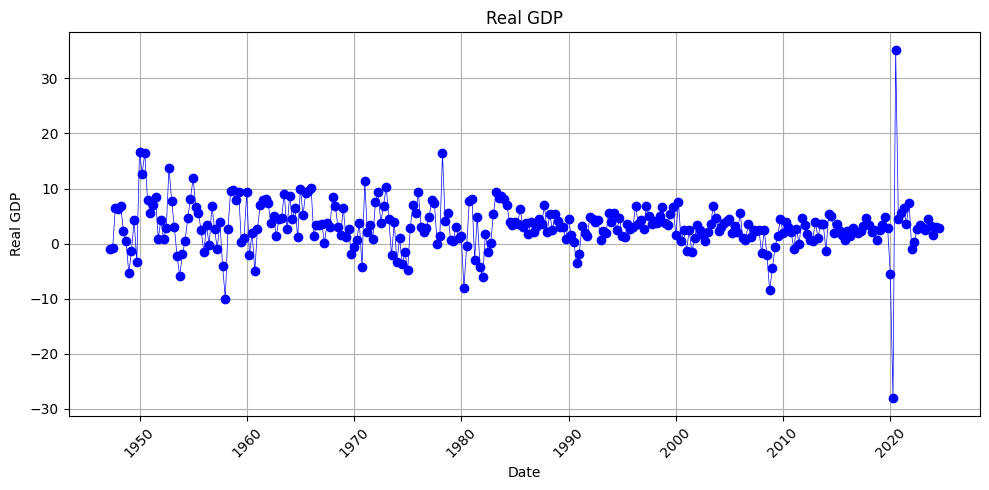

In [17]:
# Convert 'DATE' to datetime format
GDP_DF['DATE'] = pd.to_datetime(GDP_DF['DATE'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(GDP_DF['DATE'], GDP_DF['Real GDP'], color='blue', marker='o', linestyle='-', linewidth=0.5)
plt.title('Real GDP')
plt.xlabel('Date')
plt.ylabel('Real GDP')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Unemployment Rate

In [18]:
UNEMP_RATE_DF = pd.read_csv('../data/external/UNRATE.csv')

In [19]:
UNEMP_RATE_DF

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
917,2024-06-01,4.1
918,2024-07-01,4.3
919,2024-08-01,4.2
920,2024-09-01,4.1


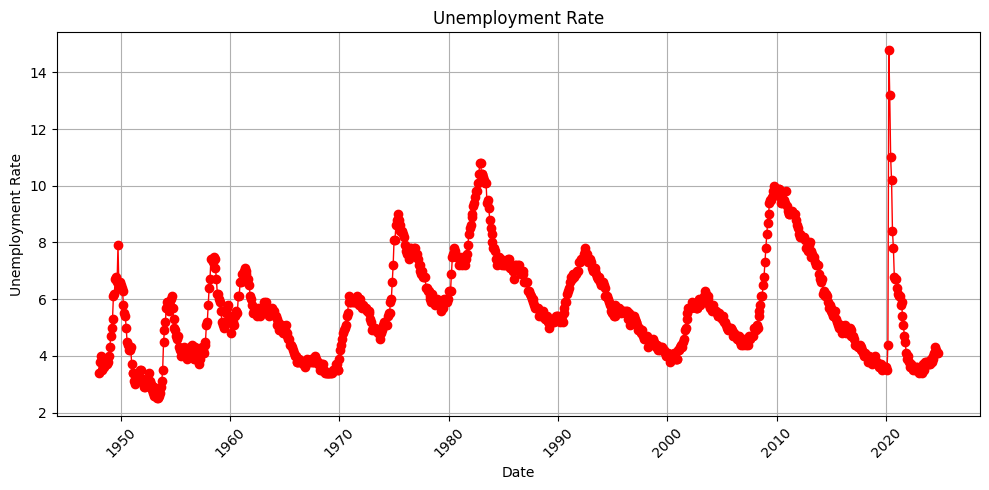

In [20]:
# Convert 'DATE' to datetime format
UNEMP_RATE_DF['DATE'] = pd.to_datetime(UNEMP_RATE_DF['DATE'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(UNEMP_RATE_DF['DATE'], UNEMP_RATE_DF['UNRATE'], color='red', marker='o', linestyle='-', linewidth=1)
plt.title('Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Industrial Production Index

In [21]:
IPI_DF = pd.read_csv('../data/external/INDPRO.csv')
IPI_DF

,DATE,INDPRO
0,1919-01-01,4.8654
1,1919-02-01,4.6504
2,1919-03-01,4.5160
3,1919-04-01,4.5966
4,1919-05-01,4.6235
...,...,...
1264,2024-05-01,103.0711
1265,2024-06-01,103.2258
1266,2024-07-01,102.5863
1267,2024-08-01,102.9329


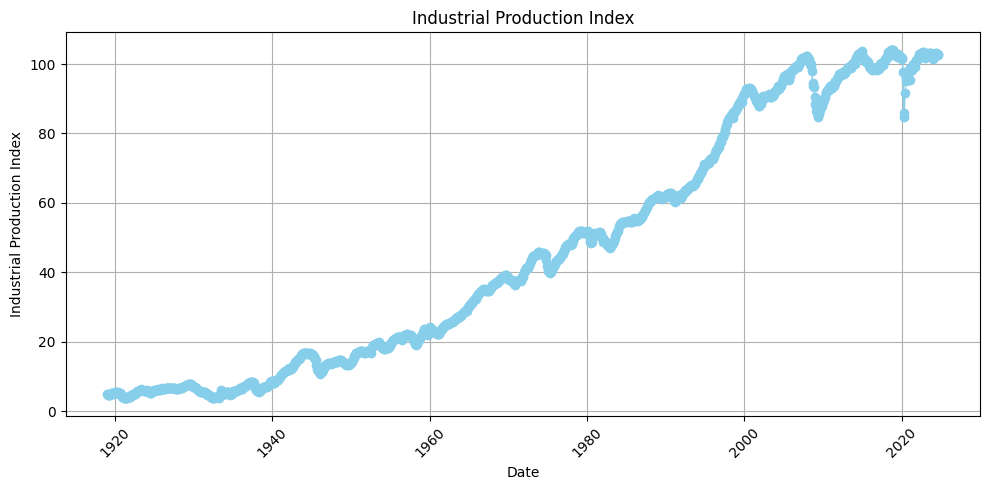

In [22]:
# Convert 'DATE' to datetime format
IPI_DF['DATE'] = pd.to_datetime(IPI_DF['DATE'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(IPI_DF['DATE'], IPI_DF['INDPRO'], color='skyblue', marker='o', linestyle='-', linewidth=1)
plt.title('Industrial Production Index')
plt.xlabel('Date')
plt.ylabel('Industrial Production Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## U.S. / Euro Foreign Exchange Rate

In [23]:
FER_DF = pd.read_csv("../data/external/DEXUSEU.csv")

In [24]:
FER_DF

,DATE,DEXUSEU
0,1999-01-04,1.1812
1,1999-01-05,1.1760
2,1999-01-06,1.1636
3,1999-01-07,1.1672
4,1999-01-08,1.1554
...,...,...
6735,2024-10-28,1.0819
6736,2024-10-29,1.0798
6737,2024-10-30,1.0864
6738,2024-10-31,1.0855


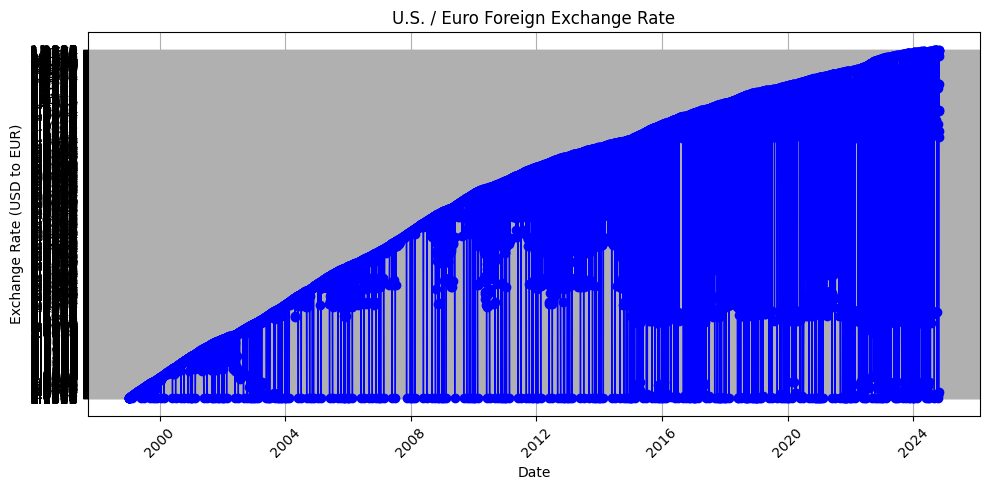

In [25]:
# Convert 'DATE' to datetime format
FER_DF['DATE'] = pd.to_datetime(FER_DF['DATE'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(FER_DF['DATE'], FER_DF['DEXUSEU'], color='blue', marker='o', linestyle='-', linewidth=1)
plt.title('U.S. / Euro Foreign Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to EUR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Merge different dataframes

In [26]:
# Ensure all 'DATE' columns are in datetime format
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')
GDP_DF['DATE'] = pd.to_datetime(GDP_DF['DATE'], errors='coerce')
UNEMP_RATE_DF['DATE'] = pd.to_datetime(UNEMP_RATE_DF['DATE'], errors='coerce')
IPI_DF['DATE'] = pd.to_datetime(IPI_DF['DATE'], errors='coerce')
FER_DF['DATE'] = pd.to_datetime(FER_DF['DATE'], errors='coerce')

In [27]:
# Merge DataFrames on 'DATE' column using outer join to include all dates
combined_df = data.merge(GDP_DF, on='DATE', how='outer') \
                  .merge(UNEMP_RATE_DF, on='DATE', how='outer') \
                  .merge(IPI_DF, on='DATE', how='outer') \
                  .merge(FER_DF, on='DATE', how='outer')

In [28]:
# Drop 'DATE' column to focus on numeric values for correlation
combined_df = combined_df.drop(columns=['DATE'])

# Convert all columns to float, coercing errors to handle any non-numeric values
combined_df = combined_df.apply(pd.to_numeric, errors='coerce')

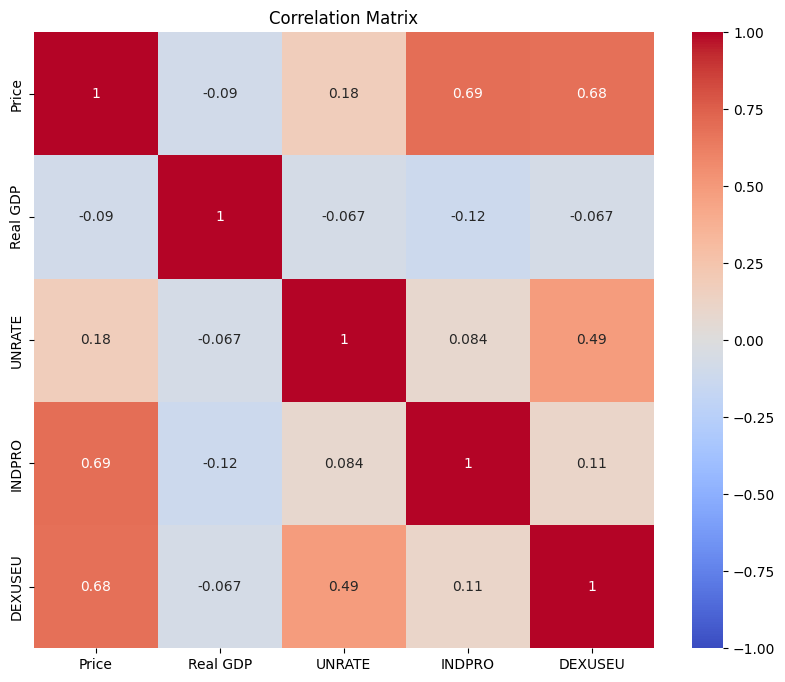

In [29]:
# Calculate correlation matrix
correlation_matrix = combined_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

Key observations 

High Correlation with Oil Price: INDPRO (industrial production) and DEXUSEU (USD/EUR exchange rate) have relatively strong positive correlations with oil price (0.69 and 0.68, respectively). This suggests that as industrial production and the USD/EUR exchange rate increase, oil prices tend to rise, indicating potential economic linkages.
Weaker Correlation with Real GDP: Real GDP shows weak correlations with other variables, including a slightly negative correlation with oil price (-0.09). This weak relationship may suggest that Brent oil prices are not directly influenced by GDP growth in the observed data.
Unemployment Rate (UNRATE): The unemployment rate has a moderate positive correlation with DEXUSEU (0.49), but a weak positive correlation with oil price (0.18). This suggests some potential link between unemployment and the exchange rate, though its direct relationship with oil prices appears limited.
Overall, the heatmap provides insights into the interrelationships between economic indicators, highlighting which variables have stronger associations with Brent oil prices and might serve as predictors in economic models.